<a href="https://colab.research.google.com/github/JasmineZhen218/DeepResearch/blob/master/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

### Question2
Consider the shhs datset distributed over slack. Use linear regression with bmi to predict log(rdi4p + 1).
Report the coefficients and a scatterplot with the fitted line.

In [3]:
url="https://raw.githubusercontent.com/ds4ph-bme/homework-6-JasmineZhen218/master/shhs1.txt?token=ANCS7T5C4J3JMK5NX5V2V7K6RZYVG"
shhs=pd.read_csv(url,sep='\t')
#shhs=shhs.dropna()
shhs.head()

,pptid,waist,COPD15,ASTHMA15,slp_lat,time_bed,timest1p,timest2p,times34p,timeremp,rdi4p,StLOutP,StOnsetP,SlpPrdP,Staging1,Staging2,Staging3,Staging4,Staging5,RestAn1,RestAn2,RestAn3,RestAn4,HTNDerv_s1,shhs1_tcvd,gender,age_s1,smokstat_s1,WASO,bmi_s1
0,1,86.0,0.0,0.0,NaN,440.5,6.258322,60.852196,19.307590,13.581891,1.438083,28,28,375.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,1,55,2.0,65.0,21.777553
1,2,107.0,0.0,0.0,NaN,225.0,0.824176,65.659340,16.758242,16.758242,17.802198,0,0,182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,78,0.0,43.0,32.950680
2,3,82.0,0.0,0.0,NaN,431.5,4.881451,40.306835,42.817295,11.994421,4.853556,167,167,358.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,77,0.0,73.0,24.114150
3,4,85.0,0.0,0.0,14.0,358.5,2.990033,29.401993,52.325581,15.282393,0.797342,54,82,301.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,48,0.0,43.5,20.185185
4,5,76.0,0.0,0.0,6.5,477.0,5.675676,68.648651,13.378378,12.297297,2.756757,7,20,370.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,66,2.0,100.5,23.309053


In [0]:
import numpy as np
y=np.log(shhs['rdi4p']+1)
x=shhs['bmi_s1']
train=pd.DataFrame({
    'x':x,
    'y':y
})
train=train.dropna()
y=train['y']
x=train['x']

In [5]:
from scipy import stats as st
beta1=st.pearsonr(x,y)[0]*np.std(y)/np.std(x)
beta0=np.mean(y)-np.mean(x)*beta1
print("The coefficients are:")
print("Intercept=",beta0)
print("Slope=",beta1)

The coefficients are:
Intercept= -0.46304140227710433
Slope= 0.07648599151230158


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'log(rdi4p+1)')

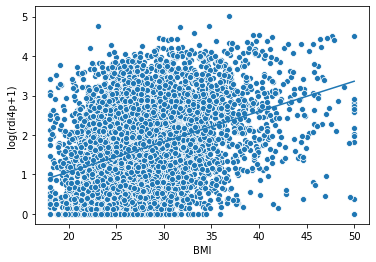

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.scatterplot(x,y)
sns.lineplot(x,beta0+beta1*x)
plt.xlabel("BMI")
plt.ylabel("log(rdi4p+1)")

 Using your formula from the previous question, predict `rdi4p` for a person with a `bmi = 30`. 

In [7]:
log_rdi4p_hat=beta0+beta1*30
rdi4p_hat=np.exp(log_rdi4p_hat)-1
print("The predicted rdi4p for bmi=30 is ",rdi4p_hat)

The predicted rdi4p for bmi=30 is  5.243483895030401
